#                            Investment Analysis Assignment

### The Spark Funds, an asset management company wants to make investments in a few companies.


### Objectives Business


* It wants to invest between 5 to 15 million USD per round of investment.
* It wants to invest only in English-speaking countries. 
* It wants to invest where most other investors are investing.
 


### Importing the packages that will be used throughout the analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 ### Checkpoint 1: Data Cleaning 1


In [2]:
#reading the companies.txt from local location and crate the companies_df.
companies_df= pd.read_csv("companies.txt",sep='\t',encoding = "ISO-8859-1")
companies_df.permalink= companies_df.permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')
companies_df['permalink']= companies_df['permalink'].str.lower()
 
#get the number of unique company in dataframe companies_df.
companies_df['permalink'].nunique()

66368

In [3]:
#reading the rounds2.csv from local location and crate the rounds_df.

rounds_df = pd.read_csv("rounds2.csv",encoding = "ISO-8859-1")
rounds_df.company_permalink= rounds_df.company_permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')
rounds_df['company_permalink'] = rounds_df['company_permalink'].str.lower()
 
#get the number of unique company_permalink in dataframe rounds_df.
rounds_df['company_permalink'].nunique()

66368

In [9]:
# rounds_df['company_permalink']

In [4]:
# Reading the mapping.csv file from local location and crate the mapping_df.
mapping_df= pd.read_csv("mapping.csv",encoding = "ISO-8859-1")
mapping_df.category_list= mapping_df.category_list.str.encode('ISO-8859-1').str.decode('ascii','ignore')
mapping_df.shape

(688, 10)

### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [5]:

data_com = pd.DataFrame(rounds_df.company_permalink.unique())
data_round = pd.DataFrame(companies_df.permalink.unique())
print(data_com.equals(data_round))

True


### Merging  the dataframe companies_df and rounds_df using left merge.
**Get the number of unique permalink of ``master_frame`` which is match to ```compaines_df``` and ``rounds_df`` as well.**

In [6]:
master_frame= pd.merge(companies_df,rounds_df, left_on='permalink',right_on='company_permalink',how='left')
master_frame.permalink.nunique()


66368

In [7]:
master_frame.shape

(114949, 16)

### Cleaning the data :
* Construct the data.
* Explore the data.
* Drop the columns which are redundant for analysis.
* Remove the null rows.
* Inspecting Null Values


In [8]:
master_frame.shape

(114949, 16)

In [9]:
#Percentage of missing values in each column (column-wise) of dataframe.
100*(master_frame.isnull().sum()/len(master_frame))

permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [10]:
master_frame.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0


In [11]:
#Dropping rows based on null columns 
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                              master_frame['category_list'].isnull())]

In [12]:
#Droping the redundent columns#
master_frame = master_frame.drop(['homepage_url','state_code','region','founded_at','funded_at','funding_round_code','city',
                                  'company_permalink','funding_round_code','funding_round_permalink','status'],axis=1)

In [13]:

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink             0.0
name                  0.0
category_list         0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

## Checkpoint 2: Funding Type Analysis
###  Average Values of Investments for Each of these Funding Types:

In [14]:
master_frame= master_frame[(master_frame['funding_round_type'] == 'venture')
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]

In [15]:
master_frame_plot = master_frame.copy()

In [16]:
#Average funding amount of venture type,seed,angle,Private_equity.
master_frame_ft =master_frame.groupby(master_frame.funding_round_type).raised_amount_usd.mean().astype('int64').sort_values(ascending = False)

In [17]:
master_frame_ft.head()

funding_round_type
private_equity    73938486
venture           11724222
angel               971573
seed                747793
Name: raised_amount_usd, dtype: int64

### As  consider Spark Funds wants to invest between 5 to 15 million USD per investment round.
#### ``Venture`` Funding type is the most suitable for it.

####  master_frame filter by ```venture``` :


In [18]:
master_frame = master_frame[(master_frame['funding_round_type']=='venture')]
master_frame.head(3)                          

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0


##  Checkpoint 3: Country Analysis


*** Spark Funds wants to invest in countries with the highest amount of funding for ``venture`` investment type.**

In [19]:
top9 = master_frame.groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False).head(9)
top9['raised_amount_usd']= top9['raised_amount_usd'].astype('int64') 
top9.head(9)

,raised_amount_usd
country_code,
USA,420068029342
CHN,39338918773
GBR,20072813004
IND,14261508718
CAN,9482217668
FRA,7226851352
ISR,6854350477
DEU,6306921981
JPN,3167647127


### The top three English-speaking countries in the data frame top9 : `USA`, `GBR`,  `IND`.

## Checkpoint 4: Sector Analysis 1

In [20]:
master_frame.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0
10,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0


In [21]:
# Get the primary sector from category_list
category_df =master_frame['category_list'].str.split('|',expand=True)[0]
category_df.head()

0             Media
4       Curated Web
8     Biotechnology
10        Analytics
11        Analytics
Name: 0, dtype: object

In [22]:
# Adding the column named Primary_sectore in master_frame dataframe.
master_frame['primary_sector']=category_df.str.lower()
master_frame.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,media
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0,curated web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0,biotechnology
10,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0,analytics
11,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0,analytics


In [23]:
# master_frame.primary_sector.unique()

In [24]:
# Droping the column named category_list
master_frame =master_frame.drop(['category_list'], axis = 1)
master_frame.head(3)

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,IND,venture,10000000.0,media
4,/organization/0-6-com,0-6.com,CHN,venture,2000000.0,curated web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,CAN,venture,719491.0,biotechnology


In [25]:
master_frame.shape

(47809, 6)

In [26]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [27]:
#  Converting the column matrix to row matrix using MELT function.
mapping_df =pd.melt(mapping_df,id_vars=['category_list'],var_name=["main_sector"],value_vars=['Automotive & Sports','Cleantech / Semiconductors',
                           'Entertainment', 'Health', 'Manufacturing','News, Search and Messaging', 'Others',
                           'Social, Finance, Analytics, Advertising'])
mapping_df.head()

,category_list,main_sector,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [28]:
mapping_df.main_sector.unique()

array(['Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'], dtype=object)

In [29]:
# Removing the rows with 0 values as you are interested in only rows with value=1
mapping_df = mapping_df[~(mapping_df["value"]==0) ]


In [30]:
#check the column category_list and rename for merger primary_sector
mapping_df['category_list']= mapping_df['category_list'].str.lower()
# mapping_df= mapping_df.rename(columns={"category_list":"primary_sector"})
#remove the values column from dataframe
# mapping_df = mapping_df.drop(['value'], axis=1)

In [31]:
mapping_df.head()

,category_list,main_sector,value
8,adventure travel,Automotive & Sports,1
14,aerospace,Automotive & Sports,1
45,auto,Automotive & Sports,1
46,automated kiosk,Automotive & Sports,1
47,automotive,Automotive & Sports,1


In [32]:
round(mapping_df.isnull().sum()/len(mapping_df)*100,2)

category_list    0.0
main_sector      0.0
value            0.0
dtype: float64

In [33]:
round(master_frame.isnull().sum()/len(master_frame)*100,2)

permalink             0.0
name                  0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
primary_sector        0.0
dtype: float64

In [34]:
master_frame.shape

(47809, 6)

In [35]:
master_frame= pd.merge(master_frame,mapping_df,left_on='primary_sector',right_on='category_list',how='left')

In [36]:
master_frame.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,category_list,main_sector,value
0,/organization/-fame,#fame,IND,venture,10000000.0,media,media,Entertainment,1.0
1,/organization/0-6-com,0-6.com,CHN,venture,2000000.0,curated web,curated web,"News, Search and Messaging",1.0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,CAN,venture,719491.0,biotechnology,biotechnology,Cleantech / Semiconductors,1.0
3,/organization/0xdata,H2O.ai,USA,venture,20000000.0,analytics,NaN,NaN,NaN
4,/organization/0xdata,H2O.ai,USA,venture,1700000.0,analytics,NaN,NaN,NaN


In [37]:
round(master_frame.isnull().sum()/len(master_frame)*100,2)

permalink             0.00
name                  0.00
country_code          0.00
funding_round_type    0.00
raised_amount_usd     0.00
primary_sector        0.00
category_list         6.52
main_sector           6.52
value                 6.52
dtype: float64

In [38]:
#Number of rows with NaN masin_sector value
len(master_frame[master_frame.main_sector.isnull()])

3117

In [39]:
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

44692

In [40]:
master_frame = master_frame.drop(['value','category_list'], axis=1)


In [41]:
master_frame.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,IND,venture,10000000.0,media,Entertainment
1,/organization/0-6-com,0-6.com,CHN,venture,2000000.0,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,CAN,venture,719491.0,biotechnology,Cleantech / Semiconductors
6,/organization/1-mainstream,1 Mainstream,USA,venture,5000000.0,apps,"News, Search and Messaging"
7,/organization/10-minutes-with,10 Minutes With,GBR,venture,4000000.0,education,Others


### Checkpoint 5: Sector Analysis 2

In [42]:
master_frame.main_sector.unique()

array(['Entertainment', 'News, Search and Messaging',
       'Cleantech / Semiconductors', 'Others', 'Health',
       'Social, Finance, Analytics, Advertising', 'Manufacturing',
       'Automotive & Sports'], dtype=object)

In [43]:
# applied range 5 to 15 million on master_frame.

master_frame = master_frame[(master_frame['raised_amount_usd']>= 5000000) & (master_frame['raised_amount_usd']<=15000000)]
master_frame.head()



,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,IND,venture,10000000.0,media,Entertainment
6,/organization/1-mainstream,1 Mainstream,USA,venture,5000000.0,apps,"News, Search and Messaging"
13,/organization/1001-menus,ZenChef,FRA,venture,6602694.0,local businesses,Others
16,/organization/1001pharmacies-com,1001pharmacies.com,FRA,venture,8900000.0,cosmetics,Health
17,/organization/1006-tv,1006.tv,CHN,venture,10000000.0,games,Entertainment


In [44]:
master_frame.shape


(14613, 7)

In [45]:
D1=master_frame[(master_frame.country_code =='USA')]
D2=master_frame[(master_frame.country_code =='GBR')]
D3=master_frame[(master_frame.country_code =='IND')]

In [46]:

print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

11149
577
299


In [47]:
#Total number of investments (count)
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

99661524549.0
5028704358.0
2683537552.0


In [48]:
D1.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
6,/organization/1-mainstream,1 Mainstream,USA,venture,5000000.0,apps,"News, Search and Messaging"
29,/organization/128-technology,128 Technology,USA,venture,11999347.0,service providers,Others
33,/organization/1366-technologies,1366 Technologies,USA,venture,15000000.0,manufacturing,Manufacturing
34,/organization/1366-technologies,1366 Technologies,USA,venture,5000000.0,manufacturing,Manufacturing
35,/organization/1366-technologies,1366 Technologies,USA,venture,5150000.0,manufacturing,Manufacturing


In [49]:
#gropy by main_sector on D1 (USA) database and count the no investment
D1.groupby(D1.main_sector).count().sort_values(by='name', ascending=False).head(5)

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector
main_sector,,,,,,
Others,2923,2923,2923,2923,2923,2923
Cleantech / Semiconductors,2297,2297,2297,2297,2297,2297
"Social, Finance, Analytics, Advertising",1912,1912,1912,1912,1912,1912
"News, Search and Messaging",1563,1563,1563,1563,1563,1563
Health,908,908,908,908,908,908


In [50]:
#funding company of top main_sector(no of investmnet wise) which received the highest investment
company_high_investment= D1[D1.main_sector=='Others'].sort_values(by='raised_amount_usd',ascending=False)
company_high_investment.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
10319,/organization/convio,Convio,USA,venture,15000000.0,software,Others
4297,/organization/avamar-technologies,Avamar Technologies,USA,venture,15000000.0,software,Others
14240,/organization/equallogic,Equallogic,USA,venture,15000000.0,enterprise software,Others
36312,/organization/schoology,Schoology,USA,venture,15000000.0,education,Others
36170,/organization/sauce-labs,Sauce Labs,USA,venture,15000000.0,enterprise software,Others


In [51]:
#group by the compnay
company_high_investment.groupby(company_high_investment.name).raised_amount_usd.sum().sort_values(ascending= False)

name
Virtustream            64300000.0
Capella Photonics      54968051.0
AirTight Networks      54201907.0
deCarta                52100000.0
Black Duck Software    51000000.0
                          ...    
NetQoS                  5000000.0
Catavolt                5000000.0
NEPENTHEA               5000000.0
MyActivityPal           5000000.0
Dolls Kill              5000000.0
Name: raised_amount_usd, Length: 2030, dtype: float64

In [52]:
#funding company of second main_sector(no of investmnet wise) which received the highest investment
company_2nd_high_investment=D1[D1.main_sector=='Cleantech / Semiconductors'].sort_values(by='raised_amount_usd',ascending=False)
company_2nd_high_investment.head()


,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
32876,/organization/prestwick-pharmaceuticals-inc,"Prestwick Pharmaceuticals, Inc.",USA,venture,15000000.0,bio-pharm,Cleantech / Semiconductors
7521,/organization/cara-therapeutics,Cara Therapeutics,USA,venture,15000000.0,biotechnology,Cleantech / Semiconductors
7589,/organization/cardiac-dimensions,Cardiac Dimensions,USA,venture,15000000.0,biotechnology,Cleantech / Semiconductors
3372,/organization/aratana-therapeutics,Aratana Therapeutics,USA,venture,15000000.0,biotechnology,Cleantech / Semiconductors
41003,/organization/taris-biomedical,TARIS Biomedical,USA,venture,15000000.0,biotechnology,Cleantech / Semiconductors


In [53]:
#group by company name of second main_secctor of D1 dataframe
company_2nd_high_investment.groupby(company_2nd_high_investment.permalink).raised_amount_usd.sum().sort_values(ascending= False)

permalink
/organization/biodesix               75300000.0
/organization/tigo-energy            68739496.0
/organization/forsight-labs          61300001.0
/organization/rheonix                56124758.0
/organization/scienergy              55375423.0
                                        ...    
/organization/azuray-technologies     5000000.0
/organization/gt-urological           5000000.0
/organization/benchling               5000000.0
/organization/hadron-systems          5000000.0
/organization/1bog                    5000000.0
Name: raised_amount_usd, Length: 1582, dtype: float64

In [54]:
D2.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
151,/organization/365scores,365Scores,GBR,venture,5500000.0,android,"Social, Finance, Analytics, Advertising"
336,/organization/7digital,7digital,GBR,venture,8468328.0,content creators,Entertainment
337,/organization/7digital,7digital,GBR,venture,10000000.0,content creators,Entertainment
364,/organization/90min,90min,GBR,venture,15000000.0,media,Entertainment
365,/organization/90min,90min,GBR,venture,5800000.0,media,Entertainment


In [55]:
#top main_sector name on D2 database no of count investment-wise
D2.groupby(D2.main_sector).count().sort_values(by='permalink', ascending=False).head(5)

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector
main_sector,,,,,,
Others,143,143,143,143,143,143
Cleantech / Semiconductors,127,127,127,127,127,127
"Social, Finance, Analytics, Advertising",98,98,98,98,98,98
"News, Search and Messaging",73,73,73,73,73,73
Entertainment,54,54,54,54,54,54


In [56]:
#funding company of top main_sector named Others (no of investmnet wise) which received the highest investment
company_high_investment_d2= D2[D2.main_sector=='Others'].sort_values(by='raised_amount_usd',ascending=False)
company_high_investment_d2.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
42801,/organization/tribold,Tribold,GBR,venture,15000000.0,software,Others
28968,/organization/notonthehighstreet,Notonthehighstreet,GBR,venture,15000000.0,e-commerce,Others
14112,/organization/environmentiq,EnvironmentIQ,GBR,venture,15000000.0,software,Others
21189,/organization/ip-access,ip.access,GBR,venture,15000000.0,software,Others
4650,/organization/azure-solutions,Azure Solutions,GBR,venture,15000000.0,software,Others


In [57]:
#company name based on reaise_amount_usd
company_high_investment_d2.groupby(company_high_investment_d2.permalink).raised_amount_usd.sum().sort_values(ascending= False)

permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
                                            ...    
/organization/vector-watch                5000000.0
/organization/photobox                    5000000.0
/organization/udex                        5000000.0
/organization/bacula-systems              5000000.0
/organization/bullguard                   5000000.0
Name: raised_amount_usd, Length: 117, dtype: float64

In [58]:
#top second main_sector name on D2 database no of count investment-wise
company_2nd_high_investment_d2= D2[D2.main_sector=='Cleantech / Semiconductors'].sort_values(by='raised_amount_usd',ascending=False)
company_2nd_high_investment_d2.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
2626,/organization/anadigm,Anadigm,GBR,venture,15000000.0,semiconductors,Cleantech / Semiconductors
13541,/organization/elixent,Elixent,GBR,venture,15000000.0,semiconductors,Cleantech / Semiconductors
29893,/organization/onyvax,Onyvax,GBR,venture,14906222.0,biotechnology,Cleantech / Semiconductors
23297,/organization/lectus-therapeutics,Lectus Therapeutics,GBR,venture,14257949.0,biotechnology,Cleantech / Semiconductors
46681,/organization/xmos,XMOS,GBR,venture,14000000.0,semiconductors,Cleantech / Semiconductors


In [59]:
#comapny name which received hightest investment
company_2nd_high_investment_d2.groupby(company_2nd_high_investment_d2.permalink).raised_amount_usd.sum().sort_values(ascending= False)

permalink
/organization/eusa-pharma                                                      35600000.0
/organization/horizon-discovery                                                31353719.0
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
/organization/elixent                                                          25000000.0
/organization/takeda-cambridge                                                 22340000.0
                                                                                  ...    
/organization/lamellar-biomedical                                               5301059.0
/organization/mmic-solutions                                                    5250000.0
/organization/flowline                                                          5104587.0
/organization/ignis-energy                                                      5014644.0
/organization/exco-intouch                                                      5000000.0


In [60]:
D3.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,IND,venture,10000000.0,media,Entertainment
77,/organization/21diamonds-india,21Diamonds,IND,venture,6369507.0,e-commerce,Others
1147,/organization/adlabs-imagica,Adlabs Imagica,IND,venture,8180000.0,entertainment,Entertainment
1882,/organization/akosha,Akosha,IND,venture,5000000.0,consumer internet,"Social, Finance, Analytics, Advertising"
2369,/organization/amagi-media-labs,Amagi Media Labs,IND,venture,5500000.0,advertising,"Social, Finance, Analytics, Advertising"


In [61]:
#no of investment main_sector wise
D3.groupby(D3.main_sector).count().sort_values(by='permalink', ascending=False).head(5)



,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector
main_sector,,,,,,
Others,109,109,109,109,109,109
"News, Search and Messaging",52,52,52,52,52,52
Entertainment,33,33,33,33,33,33
"Social, Finance, Analytics, Advertising",32,32,32,32,32,32
Manufacturing,21,21,21,21,21,21


In [62]:
#datafreme of higest main_sector 
company_high_investment_d3= D3[D3.main_sector=='Others'].sort_values(by='raised_amount_usd',ascending=False)
company_high_investment_d3.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
23675,/organization/limeroad,LimeRoad,IND,venture,15000000.0,e-commerce,Others
9049,/organization/classteacher-learning-systems,Classteacher Learning Systems,IND,venture,15000000.0,edtech,Others
45302,/organization/voylla-retail-pvt-ltd,Voylla Retail Pvt. Ltd.,IND,venture,15000000.0,e-commerce,Others
41208,/organization/tejas-networks-india,Tejas Networks India,IND,venture,15000000.0,web hosting,Others
35641,/organization/roposo,Roposo,IND,venture,15000000.0,e-commerce,Others


In [63]:

company_high_investment_d3.groupby(company_high_investment_d3.permalink).raised_amount_usd.sum().sort_values(ascending= False)

permalink
/organization/firstcry-com           39000000.0
/organization/myntra                 38000000.0
/organization/commonfloor            32900000.0
/organization/pepperfry-com          28000000.0
/organization/itzcash-card-ltd       25000000.0
                                        ...    
/organization/tastykhana              5000000.0
/organization/reznext                 5000000.0
/organization/voonik-com              5000000.0
/organization/vedantu-innovations     5000000.0
/organization/liases-foras            5000000.0
Name: raised_amount_usd, Length: 87, dtype: float64

In [64]:
company_2nd_high_investment_d3= D3[D3.main_sector=='News, Search and Messaging'].sort_values(by='raised_amount_usd',ascending=False)
company_2nd_high_investment_d3.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
26537,/organization/mobile2win-india,Mobile2Win India,IND,venture,15000000.0,mobile,"News, Search and Messaging"
18714,/organization/hike,hike,IND,venture,14000000.0,messaging,"News, Search and Messaging"
19716,/organization/imimobile,IMImobile,IND,venture,13000000.0,mobile,"News, Search and Messaging"
38363,/organization/sms-gupshup,SMS GupShup,IND,venture,12000000.0,mobile,"News, Search and Messaging"
18033,/organization/gupshup-technology-india-pvt-ltd,GupShup,IND,venture,12000000.0,mobile,"News, Search and Messaging"


In [65]:
company_2nd_high_investment_d3.groupby(company_2nd_high_investment_d3.permalink).raised_amount_usd.sum().sort_values(
    ascending= False).head()

permalink
/organization/gupshup-technology-india-pvt-ltd    33000000.0
/organization/imimobile                           23000000.0
/organization/sms-gupshup                         22000000.0
/organization/hike                                21000000.0
/organization/roadrunnr                           21000000.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

### ~A plot of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.

In [66]:
master_frame_plot.head(2)

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0


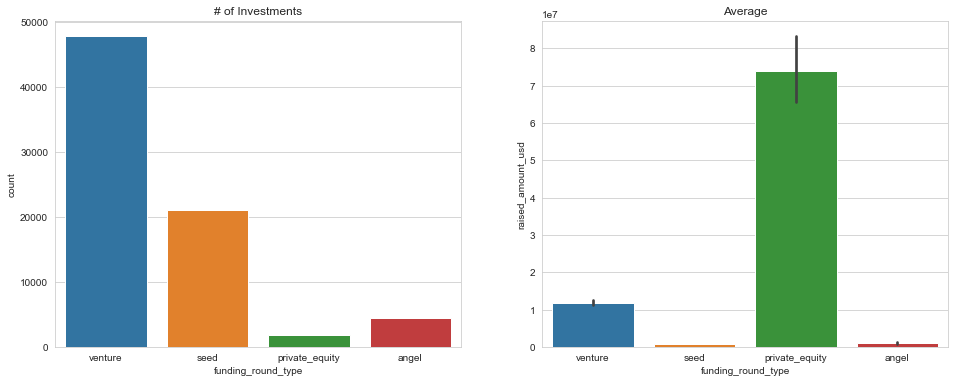

In [67]:
# set a seaborn style of your taste
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame_plot)
plt.title("# of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame_plot, estimator=np.mean)
plt.title("Average")
plt.show()

### A plot of top 9 countries against the total amount of investments of funding type ``venture``.

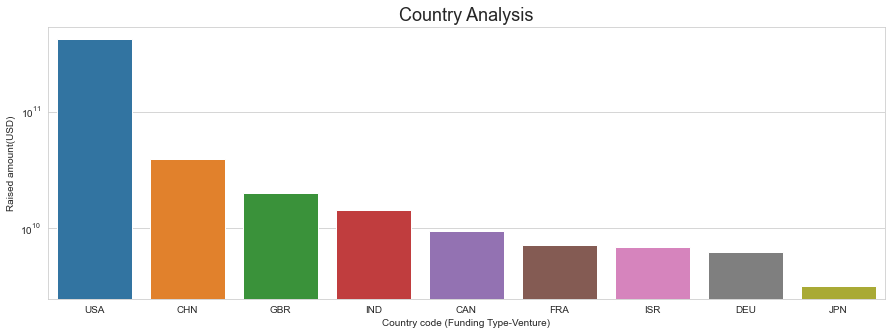

In [68]:
plt.figure(figsize=(15,5 ))
c=sns.barplot(x=top9.index, y=top9.raised_amount_usd.ravel())
c.set_yscale('log')
c.set(xlabel='Country code (Funding Type-Venture)', ylabel='Raised amount(USD)')
plt.title("Country Analysis",fontsize =18)
plt.show()

### Plotting sector-wise count and sum of investments in the three countries


In [69]:
master_d = D1[D1['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
master_d= master_d.append(D2[D2['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])])
master_d =master_d.append(D3[D3['main_sector'].isin(['Others','News, Search and Messaging','Entertainment'])])

In [70]:
master_d.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
29,/organization/128-technology,128 Technology,USA,venture,11999347.0,service providers,Others
43,/organization/170-systems,170 Systems,USA,venture,14000000.0,software,Others
48,/organization/17zuoye,17zuoye,USA,venture,5000000.0,education,Others
49,/organization/17zuoye,17zuoye,USA,venture,10000000.0,education,Others
54,/organization/1bog,One Block Off the Grid (1BOG),USA,venture,5000000.0,clean technology,Cleantech / Semiconductors


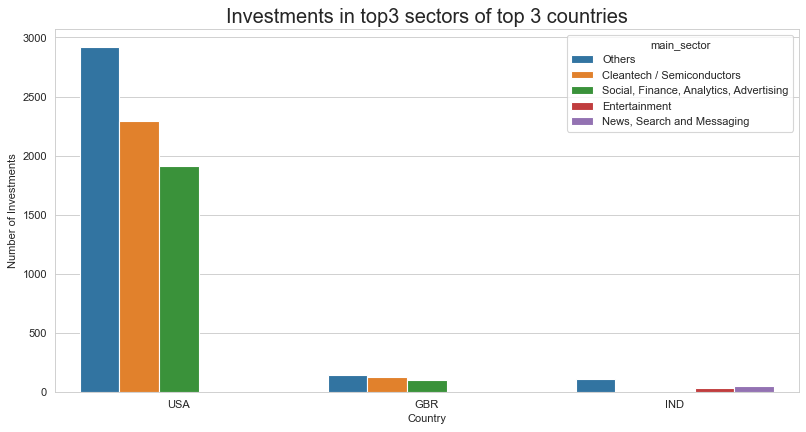

In [71]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_d ,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()

### Conclusion :
Based on the data analysis, SparksFunds should invest in 
- Funding type - **`venture`**.
- Countries - **`USA`**, **`United Kingdom`** and **`India`** respectively.
- Top three sectors to invest in **`USA`** are - **`Others`** ,**`Cleantech / Semiconductors`** and **`Social, Finance,     Analytics,Advertising`**. 

- Top 3 sectors to invest in **`United Kingdow`** are  **`Others`**, **`Cleantech / Semiconductors`** and **`Social, Finance, Analytics,Advertising**.

- Top 3 sectors to invest in **`India`** are  **`Others`** , **`News, Search and Messaging`** and **`Entertainment`**.